In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
dead = pd.read_csv("./dead.csv")
phish = pd.read_csv("./phish.csv")

In [3]:
dead.fillna("", inplace=True);
phish.fillna("", inplace=True);

dead["text"] = dead["title"] + " " + dead["selftext"]
phish["text"] = phish["title"] + " " + phish["selftext"]

In [4]:
dead.drop(columns = [col for col in dead.columns if col not in ["text", "subreddit"]],
          inplace=True)

phish.drop(columns = [col for col in phish.columns if col not in ["text", "subreddit"]],
          inplace=True)

In [5]:
dead.reset_index(inplace=True, drop=True)
phish.reset_index(inplace=True, drop=True)

In [6]:
dead["text"] = dead["text"].map(lambda x: x.replace("\n", " "))
phish["text"] = phish["text"].map(lambda x: x.replace("\n", " "))

In [7]:
dead["text"] = dead["text"].map(lambda x: re.sub("\[deleted\]", " ", x))
phish["text"] = phish["text"].map(lambda x: re.sub("\[deleted\]", " ", x))

In [8]:
dead["text"] = dead["text"].map(lambda x: re.sub("\[removed\]", " ", x))
phish["text"] = phish["text"].map(lambda x: re.sub("\[removed\]", " ", x))

In [9]:
# I referred to this stackoverflow page for help on this:
# https://stackoverflow.com/questions/8122079/
# python-how-to-check-a-string-for-substrings-from-a-list

def drop_url(text):
    text_list = text.split()
    url_tags = ["http", ".com", "www.", ".org", ".net", "&amp", "width=", "size=", "width=",
                "height=", "style=", "scrolling=", "allowFullScreen=", "frameborder=", 
                "allowTransparency=", "iframe", "&gt", "&lt"]
    
    filtered_list = [word for word in text_list if any(tag in word for tag in url_tags) == False]
    
    return " ".join(filtered_list)

In [10]:
dead["text"] = dead["text"].map(lambda x: drop_url(x))
phish["text"] = phish["text"].map(lambda x: drop_url(x))

In [11]:
dead = dead.drop(dead[dead["text"] == ""].index)
dead.reset_index(inplace=True, drop=True)

phish = phish.drop(phish[phish["text"] == ""].index)
phish.reset_index(inplace=True, drop=True)

In [12]:
cv = CountVectorizer()
dead_cv = cv.fit_transform(dead["text"])

dead_word_counts = pd.DataFrame(dead_cv.toarray(),
                                    columns=cv.get_feature_names())

dead_cv_list = [(col, dead_word_counts[col].sum()) for col in dead_word_counts.columns]

dead_wc = pd.DataFrame(dead_cv_list, columns = ["word", "count"])

In [14]:
cv = CountVectorizer()
phish_cv = cv.fit_transform(phish["text"])

phish_word_counts = pd.DataFrame(phish_cv.toarray(),
                                    columns=cv.get_feature_names())

phish_cv_list = [(col, phish_word_counts[col].sum()) for col in phish_word_counts.columns]

phish_wc = pd.DataFrame(phish_cv_list, columns = ["word", "count"])

In [26]:
pd.options.display.max_rows = 2000

In [71]:
deadwords = ["dead", "grateful", "jerry", "dark", "phil", "bobby", "star", "john", "company", "bob", "72", "drums",
             "picks", "shakedown", "gd", "china", "space", "77", "garcia", "morning", "eyes", "terrapin", "uncle", 
             "rider"]
deadcount = [3231, 942, 874, 462, 460, 421, 394, 330, 285, 279, 271, 267, 265, 256, 254, 253, 250, 245, 228, 217, 
             217, 211, 202, 199]

In [72]:
len(deadwords)

24

In [76]:
len(deadcount)

24

In [73]:
phishwords = ["phish", "trey", "mike", "curveball", "dozen", "page", "dicks", "livephish", "ptbm", "phans", "code", 
              "tweezer", "bd", "bakers", "baker", "ghost", "groove", "hood", "gin", "phan", "fish", "yem", "tube", 
              "fishman"]
phishcount = [3018, 937, 420, 293, 280, 272, 219, 184, 176, 165, 157, 156, 140, 136, 134, 129, 122, 116, 109, 109, 
              107, 106, 103, 100]

In [74]:
len(phishwords)

24

In [75]:
len(phishcount)

24

In [38]:
len(dead)

5872

In [39]:
len(phish)

5781

In [77]:
deadrate = [round(100 * x / len(dead), 1) for x in deadcount]
phishrate = [round(100 * x / len(phish), 1) for x in phishcount]

In [78]:
len(deadrate)

24

In [79]:
len(phishrate)

24

In [52]:
deadrate

[55.0,
 16.0,
 14.9,
 7.9,
 7.8,
 7.2,
 6.7,
 5.6,
 4.9,
 4.8,
 4.6,
 4.5,
 4.5,
 4.4,
 4.3,
 4.3]

In [53]:
phishrate

[52.2,
 16.2,
 7.3,
 5.1,
 4.8,
 4.7,
 3.8,
 3.2,
 3.0,
 2.9,
 2.7,
 2.7,
 2.4,
 2.4,
 2.3,
 2.2,
 2.1,
 2.0,
 1.9,
 1.9,
 1.9,
 1.8,
 1.8,
 1.7]

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [148]:
plt.style.use("seaborn-poster")
plt.style.use("fivethirtyeight")
plt.style.use("ggplot")

In [64]:
len(deadwords)

17

In [65]:
len(deadrate)

16

In [63]:
len(phishrate)

24

In [62]:
len(phishwords)

24

In [83]:
deadw = pd.DataFrame({"word": deadwords, "rate": deadrate})

phishw = pd.DataFrame({"word": phishwords, "rate": phishrate})

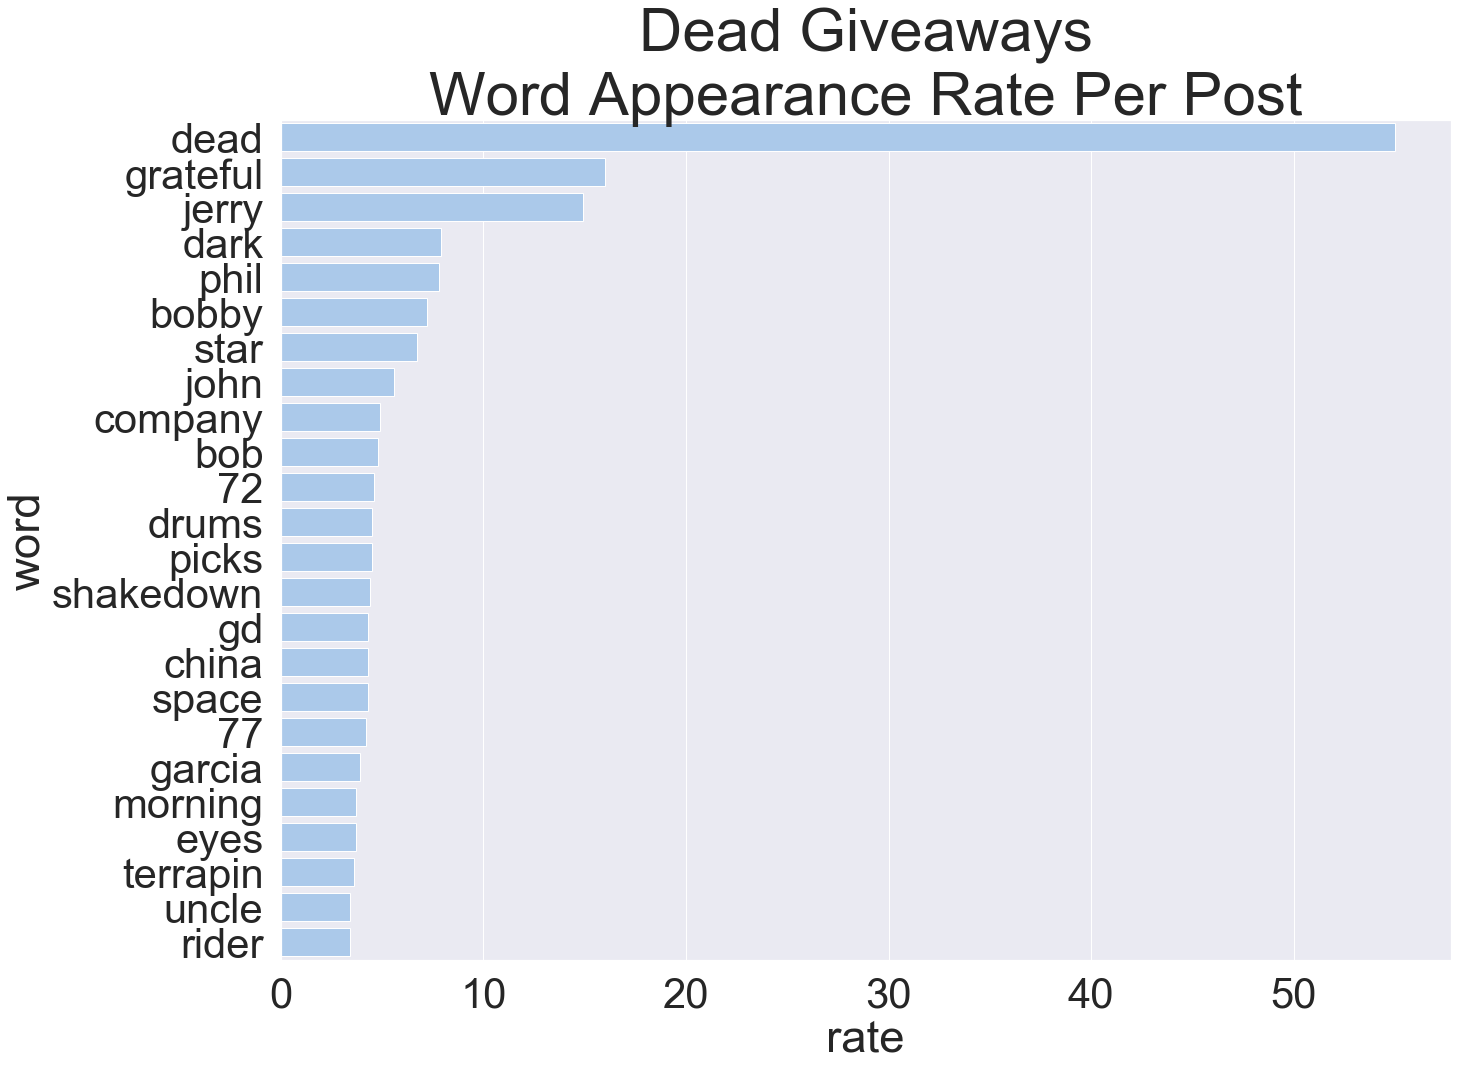

In [164]:
plt.figure(figsize=(21.5, 16))
plt.title("Dead Giveaways\nWord Appearance Rate Per Post", fontsize=60)
sns.set(font_scale=3.8)
sns.set_color_codes("pastel")
sns.barplot(x="rate", y="word", data=deadw, color="b");
plt.tight_layout()
plt.savefig("./dead-giveaway.png")

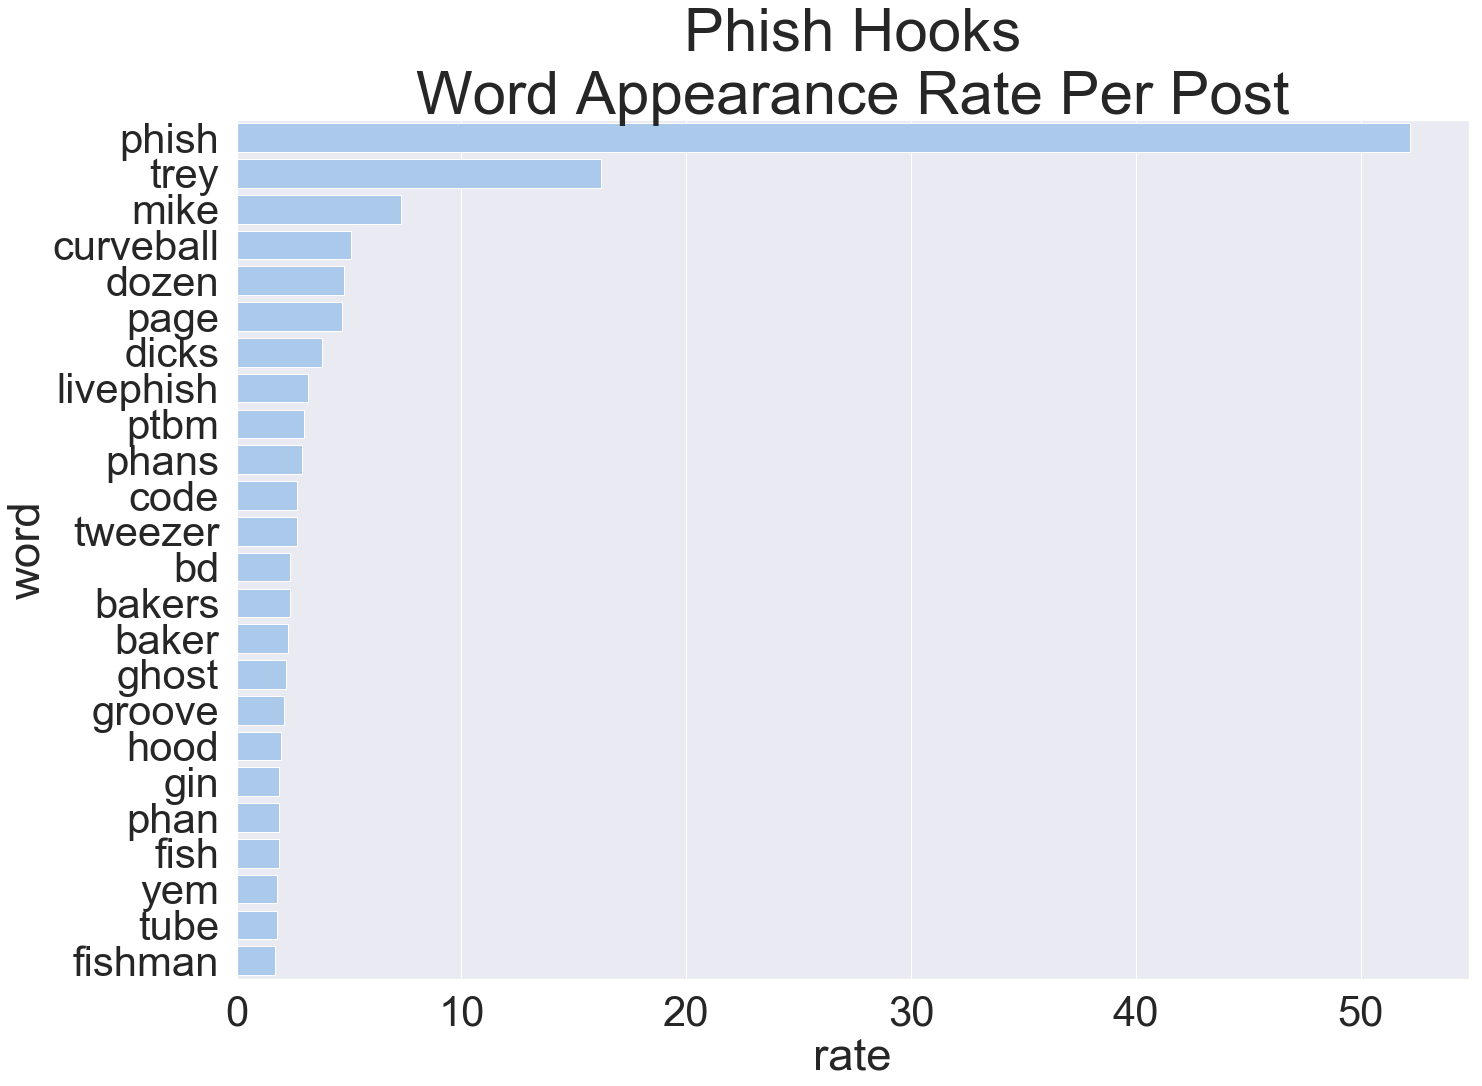

In [165]:
plt.figure(figsize=(21.5, 16))
plt.title("Phish Hooks\nWord Appearance Rate Per Post", fontsize=60)
sns.set(font_scale=3.1)
sns.set_color_codes("pastel")
sns.barplot(x="rate", y="word", data=phishw, color="b");
plt.tight_layout()
plt.savefig("./phish-hooks.png")